# Lab2 Scatter Plots, Bubble Plots, any many more...

#Q1. Titanic survival investigation

Please download the titanic dataset from the following link: 

https://www.kaggle.com/brendan45774/test-file

Please try to answer the following questions using data visualizations with their explanations.

1. Is there any significant difference between the survival rate of males and females?
2. What is the age distribution of the passengers?
3. Is there any linear or nonlinear relationship with ticket fare vs age?
4. Did the people with a higher social class (ticket/Pclass) survive more or not, also investigate the proportion of males and females in the social class?

Reference: https://www.kaggle.com/subinium/awesome-visualization-with-titanic-dataset


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
from matplotlib.ticker import FuncFormatter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from datetime import datetime
import seaborn as sns

import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('tested.csv')

,Survived
Sex,
female,1.0
male,0.0


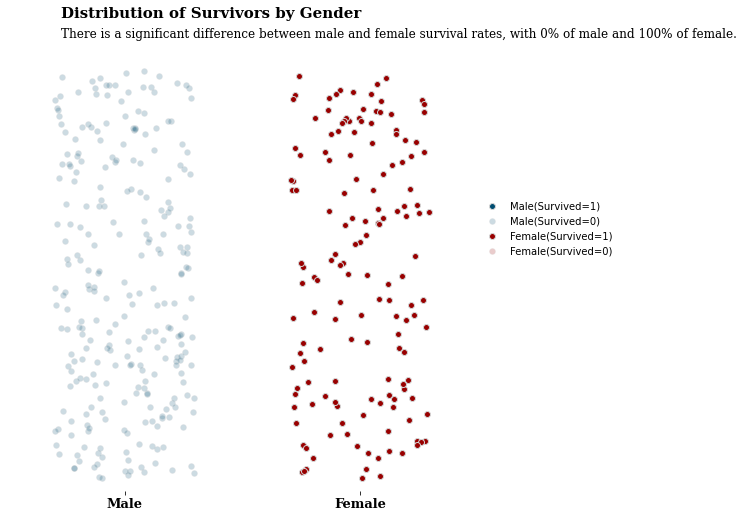

In [3]:
#1 Is there any significant difference between the survival rate of males and females?
survival_rate = data.groupby(['Sex']).mean()[['Survived']]
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']
display(survival_rate)

male_pos = np.random.uniform(0, male_rate, len(data[(data['Sex']=='male') & (data['Survived']==1)]))
male_neg = np.random.uniform(male_rate, 1, len(data[(data['Sex']=='male') & (data['Survived']==0)]))
female_pos = np.random.uniform(0, female_rate, len(data[(data['Sex']=='female') & (data['Survived']==1)]))
female_neg = np.random.uniform(female_rate, 1, len(data[(data['Sex']=='female') & (data['Survived']==0)]))

fig, ax = plt.subplots(1, 1, figsize=(9, 7))

np.random.seed(42)

# Male Stripplot
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', edgecolor='lightgray', alpha=0.2, label='Male(Survived=0)')

# Female Stripplot
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Female(Survived=0)')

# Set Figure & Axes
ax.set_xlim(-0.5, 2.0)
ax.set_ylim(-0.03, 1.1)

# Ticks
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

# Spines
for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)


# Title & Explanation
fig.text(0.1, 1, 'Distribution of Survivors by Gender', fontweight='bold', fontfamily='serif', fontsize=15)    
fig.text(0.1, 0.96, 'There is a significant difference between male and female survival rates, with 0% of male and 100% of female.', fontweight='light', fontfamily='serif', fontsize=12)    

ax.legend(loc=(0.8, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()

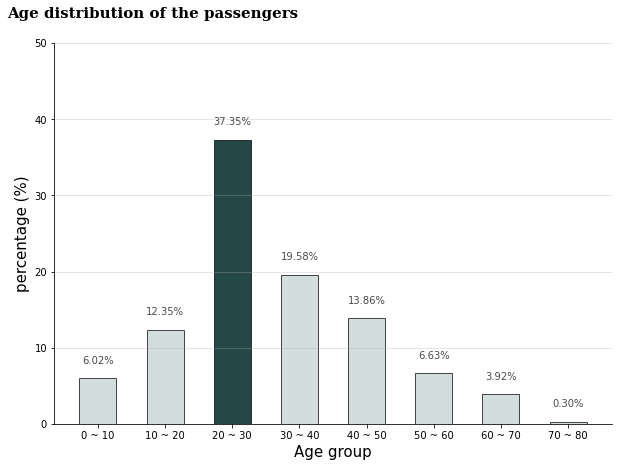

In [4]:
#2 What is the age distribution of the passengers?
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'
data['age_band'] = data['Age'].apply(age_band)
age_distribution = data.groupby(['age_band']).size() / data.groupby(['age_band']).size().sum() * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

for s in ["top","right"]:
    ax.spines[s].set_visible(False)
color_map = ['#d4dddd' for _ in range(9)]
color_map[2] = '#244747' # color highlight

ax.bar(age_distribution.index, age_distribution, 
       color=color_map, 
       width=0.55,
       edgecolor='black', 
       linewidth=0.7)
ax.set(xlabel="Age group",
       ylabel="percentage (%)")
fig.text(0.06, 0.93, "Age distribution of the passengers", fontsize=15, fontweight='bold', fontfamily='serif')

for i in age_distribution.index:
    ax.annotate(f"{age_distribution[i]:.02f}%", 
                   xy=(i, age_distribution[i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')
#increase axis font size 
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)

grid_y_ticks = np.arange(0, 51, 10)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

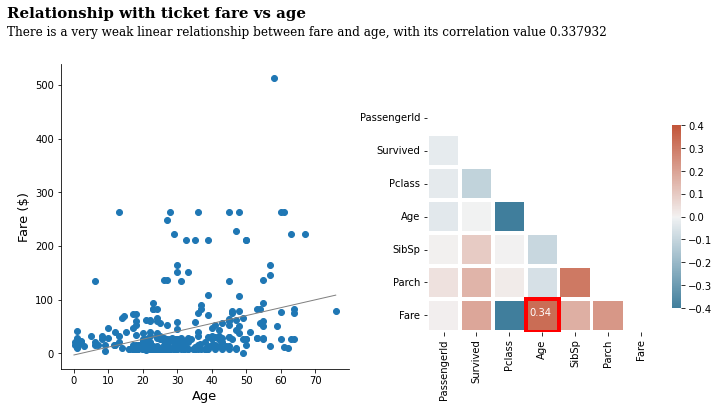

In [5]:
#3 Is there any linear or nonlinear relationship with ticket fare vs age?
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.text(0, 1.1, "Relationship with ticket fare vs age", fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0, 1.05, 'There is a very weak linear relationship between fare and age, with its correlation value 0.337932', fontweight='light', fontfamily='serif', fontsize=12)  

data1 = data[['Age', 'Fare']].dropna()
#ax1  
x = data1['Age']
x1 = np.linspace(0,max(x))
y = data1['Fare']
ax1.scatter(x,y)
#regression line
m,b = np.polyfit(x,y,1)
ax1.plot(x1,m*x1+b,'-',color='grey',linewidth=1)
#set labels
ax1.set(xlabel="Age",
       ylabel="Fare ($)")
#emove border
for s in ["top","right"]:
    ax1.spines[s].set_visible(False)

#ax2 
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, 
            square=True,
            mask=mask,
            linewidth=2.5, 
            vmax=0.4, vmin=-0.4,
            cmap=cmap,
            cbar=True, 
            cbar_kws={'shrink': 0.6},
            ax=ax2)
from matplotlib.patches import Rectangle
ax2.add_patch(Rectangle((3,6),1,1, fill=False, edgecolor='red', lw=4, label='0.338'))
plt.text(3.1, 6.5,'0.34', color='white')
#increase axis font size 
ax1.xaxis.label.set_size(13)
ax1.yaxis.label.set_size(13)
fig.tight_layout()

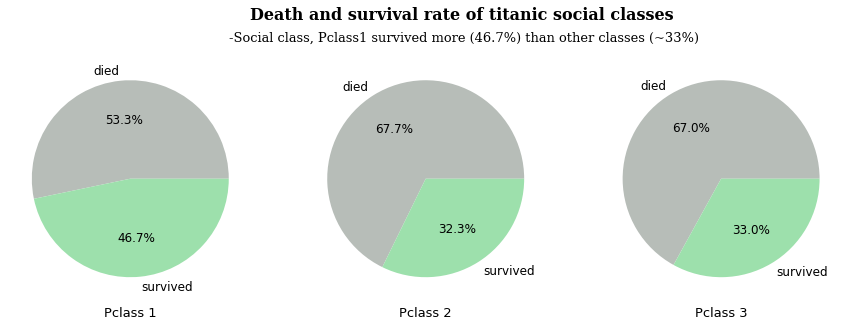

In [6]:
#4 a) Did the people with a higher social class (ticket/Pclass) survive more or not, 
survival_rate = data.groupby('Pclass')['Survived'].value_counts() / data.groupby("Pclass")['Survived'].count()
# display(survival_rate)


pclass_cnt = len(list(data['Pclass'].unique())) #3
rate = []
for c in range(1,pclass_cnt+1): 
  d = survival_rate[(c,0)] #dead rate
  s = survival_rate[(c,1)] #surv rate
  rate.append([d,s]) 

#add colors
colors = ['#b7bdb8','#9de0ac']
def prob(x): 
  return '{:.1f}'.format(x) + '%'
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,15))
fig.text(0.35,0.65,"Death and survival rate of titanic social classes", fontsize=16, fontweight='bold', fontfamily='serif')
fig.text(0.33,0.63,"-Social class, Pclass1 survived more (46.7%) than other classes (~33%)", fontsize=13, fontfamily='serif')
ax1.pie(rate[0], labels=['died', 'survived'], autopct=prob, textprops={'fontsize': 12},colors=colors)
ax1.set(xlabel="Pclass 1")
ax2.pie(rate[1], labels=['died', 'survived'], autopct=prob, textprops={'fontsize': 12},colors=colors)
ax2.set(xlabel="Pclass 2")
ax3.pie(rate[2], labels=['died', 'survived'], autopct=prob, textprops={'fontsize': 12},colors=colors)
ax3.set(xlabel="Pclass 3")

ax1.xaxis.label.set_size(13)
ax2.xaxis.label.set_size(13)
ax3.xaxis.label.set_size(13)
ax1.yaxis.label.set_size(13)


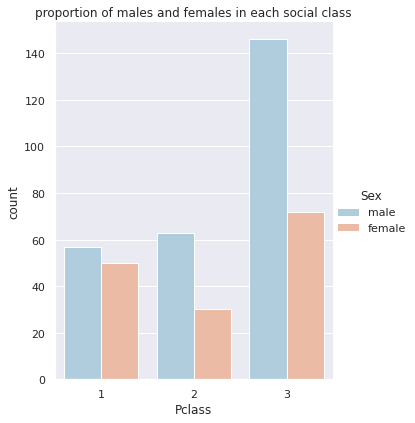

In [14]:
#9de0ac#4 b) also investigate the proportion of males and females in the social class?
ax = sns.catplot('Pclass',data=data,hue='Sex',kind='count', palette="RdBu_r")
ax.figure.set_size_inches(6,6) 
ax.set_titles()
ax.set(title="proportion of males and females in each social class")


## Q2. Bike Sharing Investigation

Please see the bike sharing data from the following link;
https://archive.ics.uci.edu/ml/machine-learning-databases/00275/

The data used for this project is about bike-sharing in Boston (2011-2012). The main objective of this analysis is to explore the reasons and elements that affect the number of bike rentals. 

There are two datasets in the format of CSV files gained from the UCL Machine Learning Repository. You can find this dataset here.

1. Day.csv The numbers of bike rentals are recorded on daily basis. There are 731 records and 16 variables.
2. Hour.csv The numbers of bike rentals were recorded on an hourly basis. There are 17,379 records and 17 variables. The variables in bold are the ones used in our analysis from different aspects.

Research questions to investigate;

1. Is the total rental counts in 2012 is larger than that in 2011?

2. Is the users tend to rent bikes for most of which months?

3. Is the weather in these months is any effect on it?

4. Is casual users are more like to rent bikes during weekends while registered users are more like to rent a bike during weekdays?

Please use visualizations to answer the research questions.


Reference: https://github.com/Yiziwinnie/Bike-Sharing-in-Boston


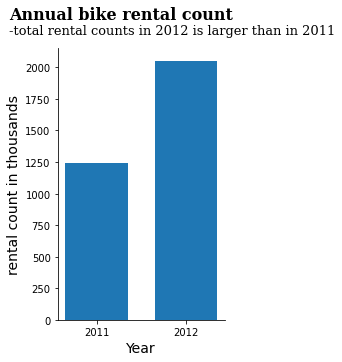

In [8]:
#1 Is the total rental counts in 2012 is larger than that in 2011?
day = pd.read_csv('day.csv')
def to_year(date): 
  dte = date.split("-")
  year = dte[0]
  return year
day['year'] = day['dteday'].apply(to_year)
year_cnt = day.groupby("year")['cnt'].sum()

fig, ax = plt.subplots(1, 1, figsize=(3, 5))

fig.text(-0.1,0.96,"Annual bike rental count", fontsize=16, fontweight='bold', fontfamily='serif')
fig.text(-0.1,0.92,"-total rental counts in 2012 is larger than in 2011", fontsize=13, fontfamily='serif')


ax.ticklabel_format(style='plain')
ax.bar(year_cnt.index, year_cnt/1000, width=0.7, align='center')
ax.set(xlabel="Year",
       ylabel="rental count in thousands")
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

for s in ["top","right"]:
    ax.spines[s].set_visible(False)

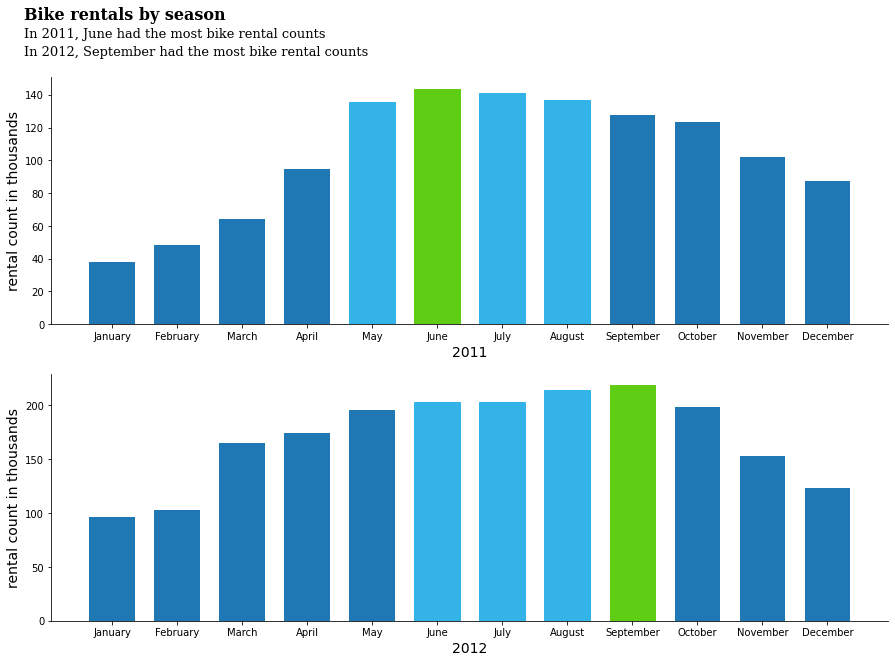

In [9]:
#2 Is the users tend to rent bikes for most of which months?
from datetime import datetime
day['y-m'] = day['year'].astype(str) +'-'+ day['mnth'].astype(str)
day['y-m']
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']

fig, (ax1,ax2) = plt.subplots(2, figsize=(15, 10))
fig.text(0.1,0.96,"Bike rentals by season", fontsize=16, fontweight='bold', fontfamily='serif')
fig.text(0.1,0.935,"In 2011, June had the most bike rental counts", fontsize=13, fontfamily='serif')
fig.text(0.1,0.91,"In 2012, September had the most bike rental counts", fontsize=13, fontfamily='serif')

#2011 month distribution
eleven = day[day['year']=='2011']
eleven_cnt = eleven.groupby("mnth")['cnt'].sum()
bar_list = ax1.bar(month, eleven_cnt/1000, width=0.7, align='center')
bar_list[5].set_color('#60CD15') 
bar_list[4].set_color('#34B3E9')
bar_list[6].set_color('#34B3E9')
bar_list[7].set_color('#34B3E9')
ax1.set(xlabel="2011",
       ylabel="rental count in thousands")
ax1.xaxis.label.set_size(14)
ax1.yaxis.label.set_size(14)
for s in ["top","right"]:
    ax1.spines[s].set_visible(False)

#2012 month distribution
twelve = day[day['year']=='2012']
twelve_cnt = twelve.groupby("mnth")['cnt'].sum()
bar_list = ax2.bar(month, twelve_cnt/1000, width=0.7, align='center')
bar_list[8].set_color('#60CD15')
bar_list[7].set_color('#34B3E9')
bar_list[6].set_color('#34B3E9')
bar_list[5].set_color('#34B3E9')
ax2.set(xlabel="2012", ylabel="rental count in thousands")
ax2.xaxis.label.set_size(14)
ax2.yaxis.label.set_size(14)

for s in ["top","right"]:
    ax2.spines[s].set_visible(False)

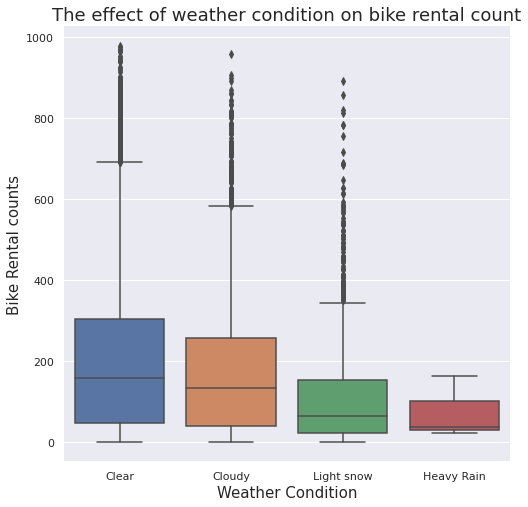

In [12]:
#3 Is the weather in these months is any effect on it?
hour = pd.read_csv('hour.csv')
sns.set()
def weather_str(digit): 
  if digit == 1: 
    return "Clear"
  elif digit == 2: 
    return "Cloudy"
  elif digit == 3: 
    return "Light snow"
  elif digit == 4: 
    return "Heavy Rain"
  
hour['weathersit'] = hour['weathersit'].apply(weather_str)
weather = hour[['weathersit','cnt']]
weather_index = ['Clear', 'Mist+Cloudy', 'Light Snow', 'Heavy rain']
plt.figure(figsize=(8,8))
# sns.set()
p = sns.boxplot(x=weather['weathersit'], y=weather['cnt'])
p.set_xlabel("Weather Condition", fontsize=15)
p.set_ylabel("Bike Rental counts", fontsize=15)
p.set_title("The effect of weather condition on bike rental count", fontsize=18)
sns.despine(bottom = True, left = True)
plt.show()
# weathersit : 
# 		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

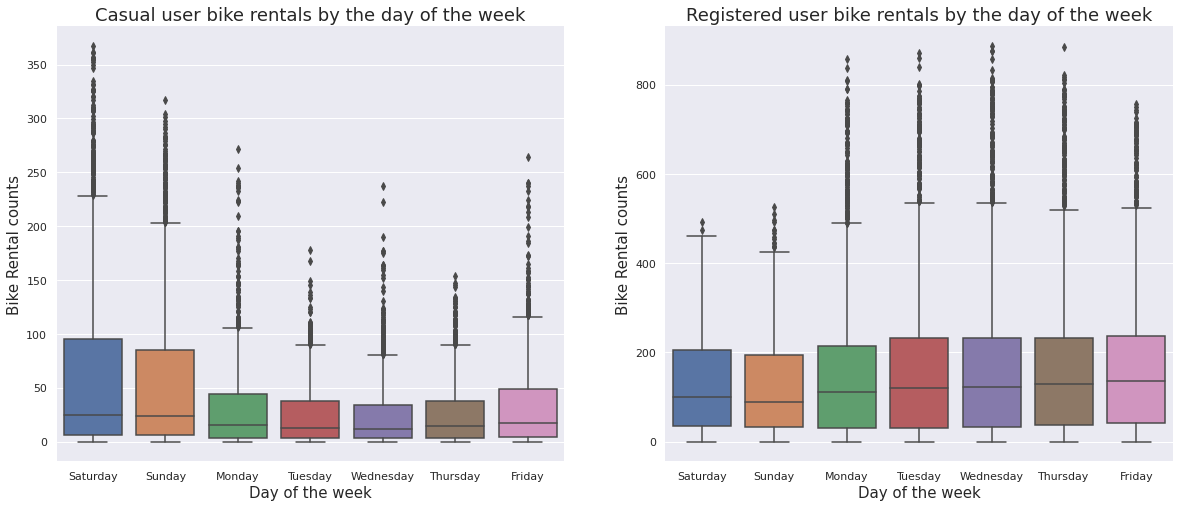

In [13]:
#4 Is casual users are more like to rent bikes during weekends 
# while registered users are more like to rent a bike during weekdays?
#0 Sunday - 6 Saturday
hour = pd.read_csv('hour.csv')

def weekday_str(digit): 
  digit = int(digit)
  if digit == 0: 
    return "Sunday"
  elif digit == 1: 
    return "Monday"
  elif digit == 2: 
    return "Tuesday"
  elif digit == 3: 
    return "Wednesday"
  elif digit == 4: 
    return "Thursday"
  elif digit == 5: 
    return "Friday"
  elif digit == 6: 
    return "Saturday"
hour['weekday'] = hour['weekday'].apply(weekday_str)
#casual
casual_df = hour[['weekday', 'casual']]
fig, ax = plt.subplots(1,2, figsize=(20,8))
p = sns.boxplot(x=casual_df['weekday'], y=casual_df['casual'], ax=ax[0])
p.set_xlabel("Day of the week", fontsize=15)
p.set_ylabel("Bike Rental counts", fontsize=15)
p.set_title("Casual user bike rentals by the day of the week", fontsize=18)
#reg
reg_df = hour[['weekday', 'registered']]
pp = sns.boxplot(x=reg_df['weekday'], y=reg_df['registered'], ax=ax[1])
pp.set_xlabel("Day of the week", fontsize=15)
pp.set_ylabel("Bike Rental counts", fontsize=15)
pp.set_title("Registered user bike rentals by the day of the week", fontsize=18)
sns.despine(bottom = True, left = True)
plt.show()

Is casual users are more like to rent bikes during weekends while registered users are more like to rent a bike during weekdays?
# True